In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from manuscript_functions.colors import patient_to_id, timepoints_cmap, default_rgba

In [2]:
sns.set(font="Arial", style="ticks")
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

In [3]:
meta = pd.read_csv("/Users/adr/Box/iPC_work/Local_files_for_paper/Updated/local_all_cells_meta_clust_celltype.csv",
                  index_col=0)
meta["PatientID"] = [patient_to_id[p] for p in meta["patient_id"]]
pred = np.load("/Users/adr/Box/iPC_work/Local_files_for_paper/Model/Experiments/sklear_models/LCO/L1O/svm_prediction.npy")
meta["prediction"] = pred

In [4]:
undefined_cells = meta[meta["cell_type"]=="Not_defined"]

In [5]:
undefined_cells

,time_point,patient_id,file_id,cluster_id,healthy_cluster,cell_type,nh_cluster,PatientID,prediction
8,Diagnosis,PAUMTZ,0,28,NaN,Not_defined,29.0,P1,Blast
10,Diagnosis,PAUMTZ,0,28,NaN,Not_defined,29.0,P1,Blast
24,Diagnosis,PAUMTZ,0,28,NaN,Not_defined,29.0,P1,Blast
29,Diagnosis,PAUMTZ,0,28,NaN,Not_defined,29.0,P1,Blast
30,Diagnosis,PAUMTZ,0,2,NaN,Not_defined,1.0,P1,Healthy
...,...,...,...,...,...,...,...,...,...
343802,Relapse,PAXMLI,41,12,NaN,Not_defined,13.0,P3,Healthy
343855,Relapse,PAXMLI,41,18,NaN,Not_defined,31.0,P3,Blast
343874,Relapse,PAXMLI,41,26,NaN,Not_defined,25.0,P3,Healthy
343902,Relapse,PAXMLI,41,12,NaN,Not_defined,13.0,P3,Blast


# Fraction of undefined cells in each sample

In [6]:
n_myeloid_cells = meta.groupby(["PatientID", "time_point"]).size().reset_index(drop=False).rename(columns={0: "n_myeloid"})
n_undefined = undefined_cells.groupby(["PatientID", "time_point"]).size().reset_index(drop=False).rename(columns={0: "n_undefined"})

plot_data = n_undefined.merge(n_myeloid_cells)
plot_data["full_file_size"] = 10000

plot_data["frac_undefined_myeloid"] = plot_data["n_undefined"]/plot_data["n_myeloid"]
plot_data["frac_undefined_all"] = plot_data["n_undefined"]/plot_data["full_file_size"]
plot_data = plot_data.sort_values(["PatientID", "time_point"], 
                                  key=lambda idx:[int(x.replace("P", "")) if x.startswith("P") else x for x in idx])



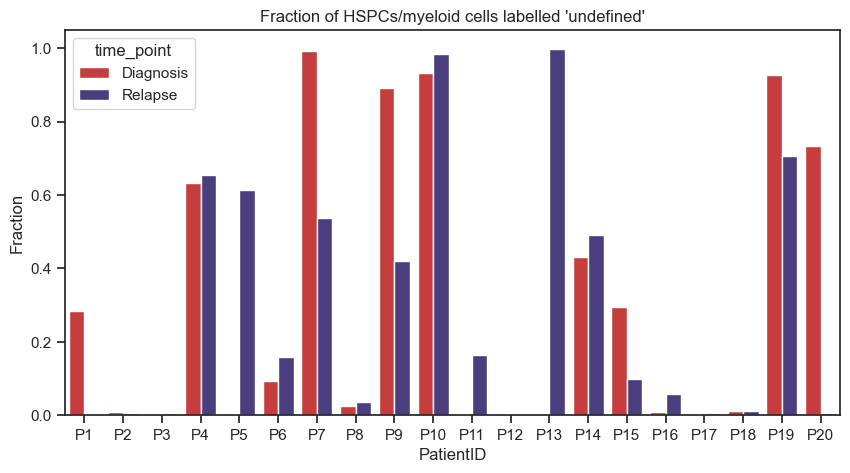

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(data=plot_data, x="PatientID", y="frac_undefined_myeloid", hue="time_point", palette=timepoints_cmap)
t = plt.title("Fraction of HSPCs/myeloid cells labelled 'undefined'")
t = plt.ylabel("Fraction")

In [16]:
plot_data[plot_data["frac_undefined_myeloid"]>0.5]

,PatientID,time_point,n_undefined,n_myeloid,full_file_size,frac_undefined_myeloid,frac_undefined_all
27,P4,Diagnosis,3674,5797,10000,0.633776,0.3674
28,P4,Relapse,3102,4738,10000,0.654707,0.3102
29,P5,Relapse,3123,5086,10000,0.614039,0.3123
32,P7,Diagnosis,9071,9128,10000,0.993755,0.9071
33,P7,Relapse,4652,8663,10000,0.536996,0.4652
36,P9,Diagnosis,7382,8272,10000,0.892408,0.7382
2,P10,Diagnosis,6686,7173,10000,0.932107,0.6686
3,P10,Relapse,9090,9230,10000,0.984832,0.9090
8,P13,Relapse,9927,9937,10000,0.998994,0.9927
19,P19,Diagnosis,8588,9258,10000,0.927630,0.8588


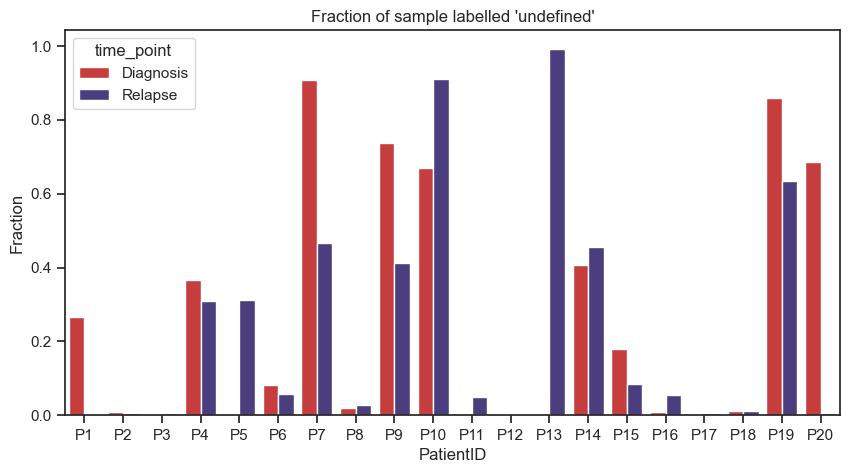

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(data=plot_data, x="PatientID", y="frac_undefined_all", hue="time_point", palette=timepoints_cmap)
t = plt.title("Fraction of sample labelled 'undefined'")
t = plt.ylabel("Fraction")

# Prediction of undefined cells

In [9]:
plt_data = undefined_cells.groupby(["PatientID", "time_point", "prediction"]).size().reset_index(drop=False).rename(columns={0: "n_cells"})

plt_data = plt_data.merge(n_undefined)
plt_data["frac_myeloid"] = plt_data["n_cells"]/plt_data["n_undefined"]
plt_data = plt_data.sort_values(["PatientID", "time_point"], 
                                  key=lambda idx:[int(x.replace("P", "")) if x.startswith("P") else x for x in idx])

plt_data["patient_timepoint"] = plt_data["PatientID"]+"_"+plt_data["time_point"]

plt_data

,PatientID,time_point,prediction,n_cells,n_undefined,frac_myeloid,patient_timepoint
0,P1,Diagnosis,Blast,2502,2663,0.939542,P1_Diagnosis
1,P1,Diagnosis,Healthy,161,2663,0.060458,P1_Diagnosis
2,P1,Relapse,Blast,20,38,0.526316,P1_Relapse
3,P1,Relapse,Healthy,18,38,0.473684,P1_Relapse
42,P2,Diagnosis,Blast,33,88,0.375000,P2_Diagnosis
...,...,...,...,...,...,...,...
41,P19,Relapse,Healthy,1229,6355,0.193391,P19_Relapse
46,P20,Diagnosis,Blast,3748,6858,0.546515,P20_Diagnosis
47,P20,Diagnosis,Healthy,3110,6858,0.453485,P20_Diagnosis
48,P20,Relapse,Blast,46,66,0.696970,P20_Relapse


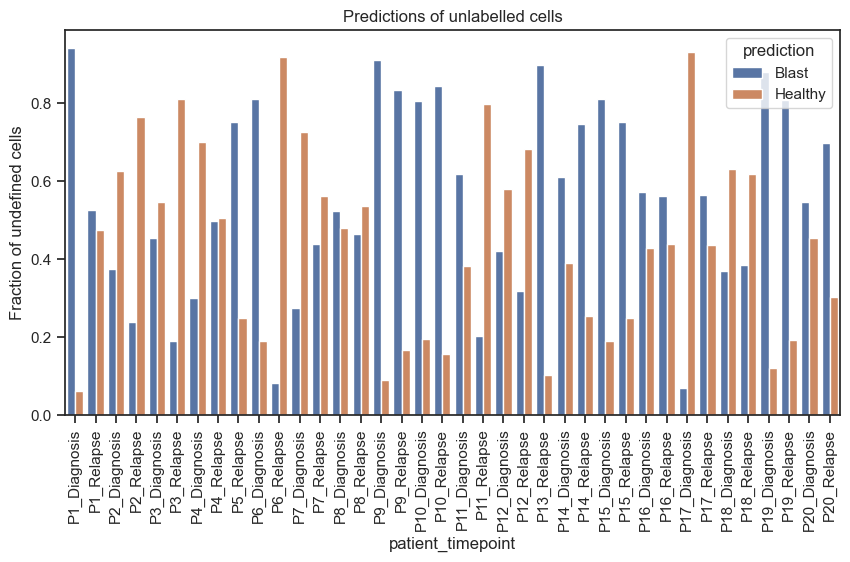

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(data=plt_data, x="patient_timepoint", y="frac_myeloid", hue="prediction")
t = plt.title("Predictions of unlabelled cells")
t = plt.ylabel("Fraction of undefined cells")
t = plt.xticks(rotation=90)

In [11]:
pie_data = plt_data.pivot(columns="prediction", values="frac_myeloid", index=["PatientID", "time_point"]).reset_index(drop=False)

pie_data


prediction,PatientID,time_point,Blast,Healthy
0,P1,Diagnosis,0.939542,0.060458
1,P1,Relapse,0.526316,0.473684
2,P10,Diagnosis,0.804966,0.195034
3,P10,Relapse,0.843344,0.156656
4,P11,Diagnosis,0.619048,0.380952
5,P11,Relapse,0.202000,0.798000
6,P12,Diagnosis,0.421053,0.578947
7,P12,Relapse,0.317073,0.682927
8,P13,Relapse,0.897250,0.102750
9,P14,Diagnosis,0.609894,0.390106


In [18]:
pie_data[pie_data["Blast"]>0.5].reset_index(drop=True)

prediction,PatientID,time_point,Blast,Healthy
0,P1,Diagnosis,0.939542,0.060458
1,P1,Relapse,0.526316,0.473684
2,P10,Diagnosis,0.804966,0.195034
3,P10,Relapse,0.843344,0.156656
4,P11,Diagnosis,0.619048,0.380952
5,P13,Relapse,0.897250,0.102750
6,P14,Diagnosis,0.609894,0.390106
7,P14,Relapse,0.746442,0.253558
8,P15,Diagnosis,0.810211,0.189789
9,P15,Relapse,0.750898,0.249102


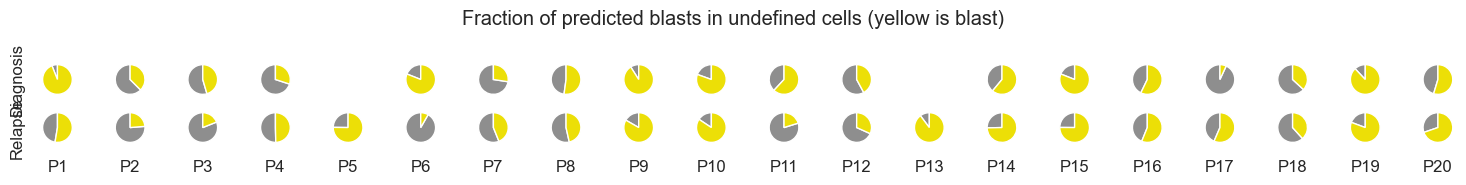

In [14]:
loop_data = pie_data[["PatientID", "time_point"]]

fig, axes = plt.subplots(2, 20, figsize=(15,1.8))
fig.delaxes(ax= axes[0,4]) # Missing diagnosis sample
fig.delaxes(ax= axes[0,12]) # Missing diagnsis sample
for i, (patient, time) in loop_data.iterrows():
#     print(i, patient, time)
    patient_num = int(patient.replace("P", ""))
    if time=="Diagnosis":
        ax = axes[0, patient_num-1]
#         print(time, 1, patient_num-1)
    if time=="Relapse":
        ax = axes[1, patient_num-1]
#         print(time, 0, patient_num-1)
        
    
    temp = pie_data.loc[(pie_data["PatientID"]==patient)&(pie_data["time_point"]==time)]
    
    healthy_frac=temp["Healthy"].values[0]
    blast_frac = temp["Blast"].values[0]
    ax.pie([healthy_frac, blast_frac],  
           colors=[default_rgba["grey"], default_rgba["yellow"]], 
           startangle=90)
    if time=="Relapse":
        ax.set_xlabel(patient)
        if patient_num==1:
            ax.set_ylabel("Relapse")
    elif patient_num==1:
        ax.set_ylabel("Diagnosis")

plt.suptitle("Fraction of predicted blasts in undefined cells (yellow is blast)")
plt.tight_layout()
plt.savefig("/Users/adr/Box/iPC_AML/Documents/Manuscript/Figures/Suppl_Figure2/pie_chart_plot.pdf")

